In [ ]:
"""
This Jupyter Notebook is used to test the SVMBDT implementation for the Trondheim dataset. 
It also test different other ML algortithms from the function SingleMachineLearningTest(). 
The labeled figures are store on the folder /Results/Trondheim_Results and the results are printed in the console. 
"""

In [1]:
#Imports 
import pip
import glob, os
from sklearn import svm 
import scipy.io as sc
import numpy as np
from HelperFunctions_ import  split_dataset_paths, subFrame,preprocessing_data, newColorLabels
from HelperFunctions_ import  combinePictures, classesInLabels, combineLabelClasses, reshape_sj, SingleMachineLearningTest
from SVMBDT import SvmDesionTreeTrain, SvmDesionTreePredict, RetrieveSubData, CombineMultiBranch, CombineLabels
from spectral import *
import pylab
import tables as tab
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn import datasets
import copy
import spectral
import tables as ta
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from PIL import Image


In [2]:

trondheim_data = plt.imread("../Datasets/TrondheimDataset/Trondheim_2022_08_23T10_26_43-bin3.png")
trondheim_gt = np.load("../Datasets/TrondheimDataset/Trondheim_labels_2022-08-23.npz")["labels"]

In [3]:
new_trondheim = []

for i in range(len(trondheim_data[0])): 
    x_array = []
    for j in range(len(trondheim_data)-1,-1,-1): 
            x_array.append(trondheim_data[j][i]) 
    new_trondheim.append(x_array)

In [4]:
print(len(new_trondheim))
print(len(new_trondheim[0]))

956
228


In [5]:
plt.imshow(new_trondheim)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_Data", dpi = 300, bbox_inches="tight")
plt.close()

In [6]:
#Preprocess the labeling 

new_trondheim_gt = []
y = trondheim_gt.flatten()

for i in range(0,len(y),3): 
    new_trondheim_gt.append(y[i])

new_trondheim_gt = np.array(new_trondheim_gt)

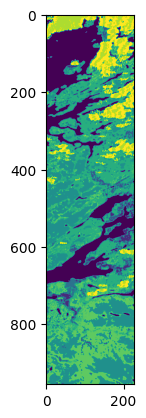

In [7]:
plt.imshow(new_trondheim_gt.reshape(956,228))

In [8]:
classesInLabels(y)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int16)

In [9]:
X = np.array(new_trondheim).reshape((-1,3))
X = preprocessing.scale(X, axis=0)
y = new_trondheim_gt.flatten()

C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.95, random_state=1)

In [11]:
linear_ovo_yout, linear_ovr_yout, rbf_yout, kmeans_yout, knearest_yout,random_forest_yout = SingleMachineLearningTest(X,y,X_train, y_train,1e6,8)

Linear 1-vs-1 Training Time: 1.799sec.
Linear 1-vs-Rest Training Time: 2.441sec.
RBF Training Time: 2.516502sec.
Kmeans Training Time: 0.312sec.
KNearestNeighbor Training Time: 0.01sec.
Random Forest Training Time: 0.57sec.
Linear 1-vs-1 Predict Time: 29.843sec.
Linear 1-vs-Rest Predict Time: 0.03sec.
RBF Predict Time: 146.721sec.
KMeans Predict Time: 0.006sec.
KNearestNeighbor Predict Time: 3.663sec.
Random Forest Predict Time: 3.001sec.
Linear 1-vs-1 Accuracy: 62.39%
Linear 1-vs-Rest Accuracy: 60.089999999999996%
RBF Accuracy: 62.11%
KMeans Accuracy: 3.46%
KNearestNeighbour Accuracy: 68.60000000000001%
Random Forest Accuracy: 67.30000000000001%
Linear 1-vs-1 Total SVM Support_Vectors : 8540
RBF Total SVM Support_Vectors : 8514
Linear 1-vs-1 Average SVM Support_Vectors : 948.889
RBF Average SVM Support_Vectors : 946.0


In [12]:
# 2) Water, 3) Cropland, 4) Pasture, 5) City, 6) Rock, 7) Thin Forest, 8) Thick Forest, 9) Cloud, 10) Thin Cloud

tb1 = {0 : [[2,3,9,10],[4,5,6,7,8]], 
      1 : [[[3],[2,9,10]],[[6,7,8],[4,5]]],
      2 : [[[2],[9,10]],[[4],[5]]], 
      3 : [[[9],[10]],[]]}

tb2 = {0 : [[6],[7,8]], 
       1 : [[],[[7],[8]]]
        }

iter = 1e6

sbm1 = {0 :  LinearSVC(class_weight= "balanced", max_iter=iter), 
       1 : [LinearSVC(class_weight= "balanced", max_iter=iter), LinearSVC(class_weight= "balanced", max_iter=iter)], 
       2 : [LinearSVC(class_weight= "balanced", max_iter=iter), LinearSVC(class_weight= "balanced", max_iter=iter)], 
       3 : [LinearSVC(class_weight= "balanced", max_iter=iter), False]
       }

sbm2 = {0 :  LinearSVC(class_weight= "balanced", max_iter=iter), 
       1 : [False, LinearSVC(class_weight= "balanced", max_iter=iter)]
       }

svm_tree_branches1, sub_data_branch1 = SvmDesionTreeTrain(X_train, y_train, tb1, sbm1, sub_data = 1)

sub_data2, sub_labels2 = RetrieveSubData(X_train,y_train, tb2[0])
svm_tree_branches2, sub_data_branch2 = SvmDesionTreeTrain(sub_data2, sub_labels2, tb2, sbm2, sub_data=1)


The training time is: 0.468 sec.
The training time is: 0.039 sec.


In [13]:
pl1, sd1, pbl1 = SvmDesionTreePredict(X, svm_tree_branches1, tb1, sub_data=1)

The first branch: 0.004
The prediction time is: 1.544 sec.


In [14]:
sub_data_2 = sd1[1][1][pbl1[1][1] == min(tb1[1][1][0])]
pl2, sd2, pbl2 = SvmDesionTreePredict(sub_data_2, svm_tree_branches2, tb2, sub_data=1)

The first branch: 0.003
The prediction time is: 0.226 sec.


In [15]:
def CombineMultiBranch(sub_branch_label,sub_tree_branch, branch_label): 
    
    combined_sub_label = copy.deepcopy(sub_branch_label)
    combined_label = copy.deepcopy(branch_label)
    
    classes = sub_tree_branch[0][0] + sub_tree_branch[0][1]

    combined_label[combined_label == min(classes)] = combined_sub_label

    return combined_label

In [16]:
cmb2 = CombineMultiBranch(pl2, tb2, pbl1[1][1])
pbl1[1][1] = cmb2
predicted_label = CombineLabels(pbl1, tb1)

In [17]:
classesInLabels(predicted_label)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int16)

In [18]:
print("The SVMBDT overall accuracy: " , round(100 *np.sum(predicted_label == y)/len(y),3), "%") 

The SVMBDT overall accuracy:  60.261 %


In [19]:
def newColorLabels(labels, dimx, dimy, color_label): 
    new_label = copy.deepcopy(labels)
    new_label = new_label.reshape(dimx, dimy)
    new_new_label = []

    for i in range(len(new_label)): 
        x_array = []
        for j in range(len(new_label[0])): 
            x_array.append(color_label[new_label[i][j]])
        new_new_label.append(x_array)
    
    return np.array(new_new_label)

In [20]:
trondheim_color_label = {0: [0,0,255], 1 : [255,255,0], 2 : [255,165,0], 3 : [150,150,150],
                     4 : [90,90,90], 5 : [144, 238, 144], 6 : [34,139,34], 7: [200,200,200], 8 : [240,240,240]}

# 2) Water, 3) Cropland, 4) Pasture, 5) City, 6) Rock, 7) Thin Forest, 8) Thick Forest, 9) Cloud, 10) Thin Cloud

t=255
cmap = {}

for i in range(len(trondheim_color_label)): 
    cmap[i] = np.array(trondheim_color_label[i] + [255])/255

new_y = copy.deepcopy(y)

for i in range(len(classesInLabels(y))): 
    new_y[new_y == i+2] = i


# 1) Spruce, 2) Pine , 3) Decidous (leaf), 4) Water, 5) Clouds, and 0) other
mjosa_classes = {0: "Water", 1: "Cropland", 2: "Pasture", 3: "City", 4: "Rock", 5: "Thin Forest", 6: "Thick Forest", 7: "Cloud", 8: "Thin Cloud"}

yout_color = newColorLabels(new_y,956,228,trondheim_color_label)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

patches = [mpatches.Patch(color=cmap[i], label=mjosa_classes[i]) for i in trondheim_color_label] 

plt.imshow(yout_color)
plt.axis('off')
#plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.savefig("../Results/Trondheim_Results/Trondheim_GT", dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\3058757699.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_GT", dpi = 300, bbox_inches="tight")


In [44]:
figLegend = pylab.figure(figsize = (1.5,2.1))
figLegend.legend(handles=patches,loc = 'upper left')
figLegend.savefig("../Results/Trondheim_Results/Trondheim_Classes", dpi=500)


<Figure size 150x210 with 0 Axes>

In [22]:
new_predicted_label = copy.deepcopy(predicted_label)

for i in range(len(classesInLabels(predicted_label))): 
    new_predicted_label[new_predicted_label == i+2] = i

yout_color = newColorLabels(new_predicted_label,956,228, trondheim_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_SVMBDT",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\2464990960.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_SVMBDT",dpi = 300, bbox_inches="tight")


In [23]:
new_linear_ovo_yout = copy.deepcopy(linear_ovo_yout)

for i in range(len(classesInLabels(linear_ovo_yout))): 
    new_linear_ovo_yout[new_linear_ovo_yout == i+2] = i

yout_color = newColorLabels(new_linear_ovo_yout,956,228, trondheim_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_linear_ovo",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\3285824948.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_linear_ovo",dpi = 300, bbox_inches="tight")


In [24]:
new_linear_ovr_yout = copy.deepcopy(linear_ovr_yout)

for i in range(len(classesInLabels(linear_ovr_yout))): 
    new_linear_ovr_yout[new_linear_ovr_yout == i+2] = i

yout_color = newColorLabels(new_linear_ovr_yout,956,228, trondheim_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_linear_ovr",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\2276179491.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_linear_ovr",dpi = 300, bbox_inches="tight")


In [25]:
new_rbf_yout = copy.deepcopy(rbf_yout)

for i in range(len(classesInLabels(rbf_yout))): 
    new_rbf_yout[new_rbf_yout == i+2] = i

yout_color = newColorLabels(new_rbf_yout,956,228, trondheim_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_RBF",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\162706846.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_RBF",dpi = 300, bbox_inches="tight")


In [26]:
new_knearest_yout = copy.deepcopy(knearest_yout)

for i in range(len(classesInLabels(linear_ovo_yout))): 
    new_knearest_yout[new_knearest_yout == i+2] = i

yout_color = newColorLabels(new_knearest_yout,956,228, trondheim_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_KNN",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\822274492.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_KNN",dpi = 300, bbox_inches="tight")


In [27]:
new_random_forest_yout = copy.deepcopy(random_forest_yout)

for i in range(len(classesInLabels(linear_ovo_yout))): 
    new_random_forest_yout[new_random_forest_yout == i+2] = i

yout_color = newColorLabels(new_random_forest_yout,956,228, trondheim_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_RF",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\1780204245.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_RF",dpi = 300, bbox_inches="tight")


In [28]:
# 2) Water, 3) Cropland, 4) Pasture, 5) City, 6) Rock, 7) Thin Forest, 8) Thick Forest, 9) Cloud, 10) Thin Cloud

trondheim_color_label = {4: [0,0,255], 2 : [255,255,0], 3 : [255,165,0], 5 : [150,150,150],
                     7 : [90,90,90], 0 : [144, 238, 144], 8 : [34,139,34], 1: [200,200,200], 6 : [240,240,240]}

new_kmeans_yout = copy.deepcopy(kmeans_yout)

#for i in range(len(classesInLabels(kmeans_yout))): 
#    new_knearest_yout[new_kmeans_yout == i+2] = i

yout_color = newColorLabels(new_kmeans_yout,956,228, trondheim_color_label)

plt.imshow(yout_color)
plt.axis('off')
plt.savefig("../Results/Trondheim_Results/Trondheim_KM",dpi = 300, bbox_inches="tight")
plt.close()

C:\Users\jonas\AppData\Local\Temp\ipykernel_38880\1408010290.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../Results/Trondheim_Results/Trondheim_KM",dpi = 300, bbox_inches="tight")
